# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL


url = 'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid='+weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']-273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['sys']['country']
        city_date = city_weather['dt']
        #city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        pass
    
    
    
   #except:
       # print("City not found. Skipping...")
        #pass    
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tongchuan
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | albanel
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | dryden
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | innisfail
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | bara
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | yining
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | taltal
Processing Record 21 of Set 1 | rocha
Processing Record 22 of Set 1 | kralendijk
Processing Record 23 of Set 1 | punta arenas


Processing Record 46 of Set 4 | leo
Processing Record 47 of Set 4 | srednekolymsk
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | yar-sale
Processing Record 0 of Set 5 | constitucion
Processing Record 1 of Set 5 | zemio
Processing Record 2 of Set 5 | yulara
Processing Record 3 of Set 5 | palabuhanratu
'coord'
Processing Record 4 of Set 5 | alamos
Processing Record 5 of Set 5 | togur
Processing Record 6 of Set 5 | kibala
Processing Record 7 of Set 5 | calama
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | pisco
Processing Record 10 of Set 5 | sept-iles
Processing Record 11 of Set 5 | faanui
Processing Record 12 of Set 5 | ambilobe
Processing Record 13 of Set 5 | codrington
Processing Record 14 of Set 5 | paamiut
Processing Record 15 of Set 5 | inhambane
Processing Record 16 of Set 5 | pitman
Processing Record 17 of Set 5 | chuy
Processing Record 18 of Set 5 | bengkulu
Processing Record 19 of Set 5 | chongoyape
Processing Record 20 of Set 5 | nuev

Processing Record 44 of Set 8 | thinadhoo
Processing Record 45 of Set 8 | redlands
Processing Record 46 of Set 8 | trinidad
Processing Record 47 of Set 8 | orlik
Processing Record 48 of Set 8 | port macquarie
Processing Record 49 of Set 8 | dakar
Processing Record 0 of Set 9 | nome
Processing Record 1 of Set 9 | amreli
Processing Record 2 of Set 9 | macklin
Processing Record 3 of Set 9 | farmington
Processing Record 4 of Set 9 | tromso
Processing Record 5 of Set 9 | saint-francois
Processing Record 6 of Set 9 | kunnamangalam
Processing Record 7 of Set 9 | chantada
Processing Record 8 of Set 9 | north bend
Processing Record 9 of Set 9 | eutin
Processing Record 10 of Set 9 | richards bay
Processing Record 11 of Set 9 | alice
Processing Record 12 of Set 9 | sueyoshi
Processing Record 13 of Set 9 | nador
Processing Record 14 of Set 9 | qui nhon
Processing Record 15 of Set 9 | saint-georges
Processing Record 16 of Set 9 | jalingo
Processing Record 17 of Set 9 | altayskoye
Processing Record 

Processing Record 39 of Set 12 | gornopravdinsk
Processing Record 40 of Set 12 | kavaratti
Processing Record 41 of Set 12 | tateyama
Processing Record 42 of Set 12 | vostok
Processing Record 43 of Set 12 | nemuro
Processing Record 44 of Set 12 | saint-augustin
Processing Record 45 of Set 12 | novyy urengoy
Processing Record 46 of Set 12 | zhuozhou
'coord'
Processing Record 47 of Set 12 | havoysund
Processing Record 48 of Set 12 | chulym
Processing Record 49 of Set 12 | abha
Processing Record 0 of Set 13 | minyar
Processing Record 1 of Set 13 | colares
Processing Record 2 of Set 13 | south venice
Processing Record 3 of Set 13 | sawankhalok
Processing Record 4 of Set 13 | tuggurt
'coord'
Processing Record 5 of Set 13 | wasaga beach
Processing Record 6 of Set 13 | qasigiannguit
Processing Record 7 of Set 13 | umea
Processing Record 8 of Set 13 | bhadrak
Processing Record 9 of Set 13 | pimentel
Processing Record 10 of Set 13 | ginir
Processing Record 11 of Set 13 | maceio
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit='s')
# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tongchuan,35.0806,109.0897,15.81,22,66,1.48,CN,1678374207
1,hobart,-42.8794,147.3294,14.92,73,91,4.12,AU,1678373965
2,butaritari,3.0707,172.7902,27.18,78,100,4.64,KI,1678373967
3,grand gaube,-20.0064,57.6608,27.43,82,70,2.68,MU,1678374029
4,albanel,48.8832,-72.4487,1.26,82,100,3.86,CA,1678374208


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tongchuan,35.0806,109.0897,15.81,22,66,1.48,CN,1678374207
1,hobart,-42.8794,147.3294,14.92,73,91,4.12,AU,1678373965
2,butaritari,3.0707,172.7902,27.18,78,100,4.64,KI,1678373967
3,grand gaube,-20.0064,57.6608,27.43,82,70,2.68,MU,1678374029
4,albanel,48.8832,-72.4487,1.26,82,100,3.86,CA,1678374208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

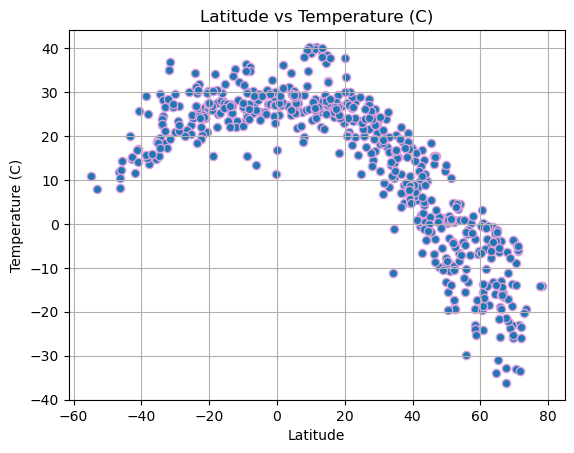

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter( city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='plum')

# Incorporate the other graph properties
plt.title('Latitude vs Temperature (C)')
plt.ylabel('Temperature (C)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

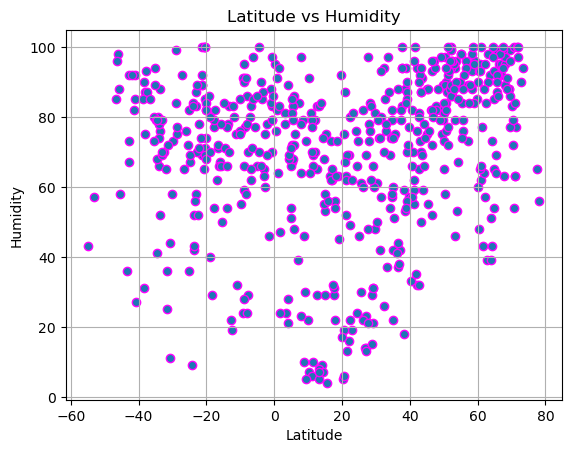

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter( city_data_df['Lat'], city_data_df['Humidity'], edgecolor='fuchsia')

# Incorporate the other graph properties
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

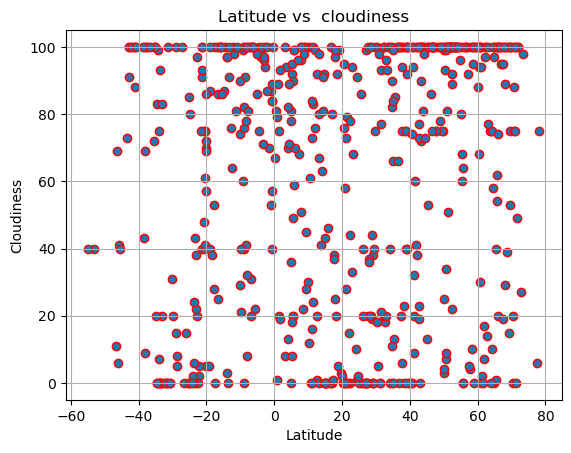

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='red')

# Incorporate the other graph properties
plt.title('Latitude vs  cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

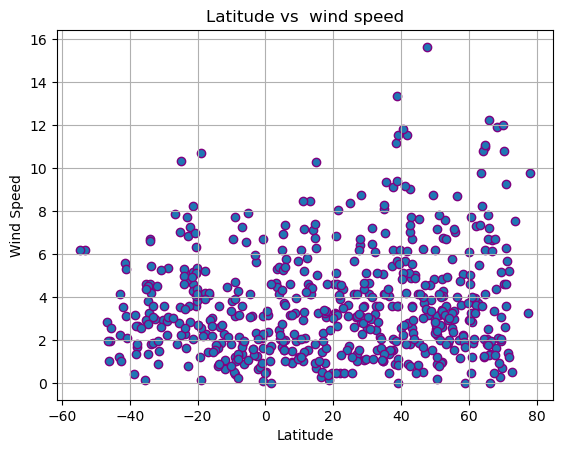

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='purple')

# Incorporate the other graph properties
plt.title('Latitude vs  wind speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values,edgecolor = 'black')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tongchuan,35.0806,109.0897,15.81,22,66,1.48,CN,1678374207
2,butaritari,3.0707,172.7902,27.18,78,100,4.64,KI,1678373967
4,albanel,48.8832,-72.4487,1.26,82,100,3.86,CA,1678374208
7,dryden,49.7833,-92.7503,-7.84,79,75,3.09,CA,1678374209
11,leningradskiy,69.3833,178.4167,-13.79,88,100,1.93,RU,1678373973


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]
#southern_hemi_df=southern_hemi_df.reset_index(drop =True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hobart,-42.8794,147.3294,14.92,73,91,4.12,AU,1678373965
3,grand gaube,-20.0064,57.6608,27.43,82,70,2.68,MU,1678374029
5,vaini,-21.2000,-175.2000,24.09,69,40,4.63,TO,1678373958
6,port alfred,-33.5906,26.8910,24.54,76,0,1.79,ZA,1678373964
8,busselton,-33.6500,115.3333,17.67,88,93,4.42,AU,1678373957


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8060243133226692


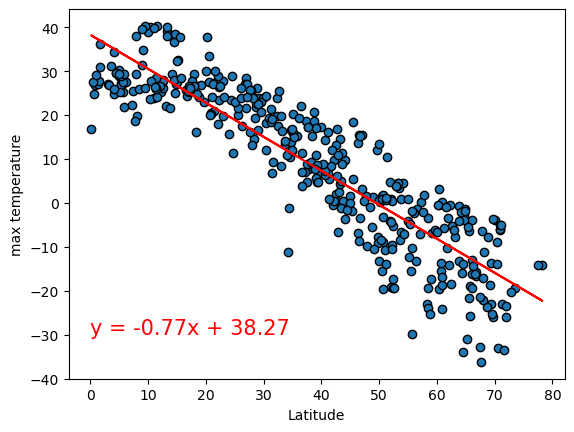

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'max temperature', (0,-30))

The r-value is: 0.3461238155116379


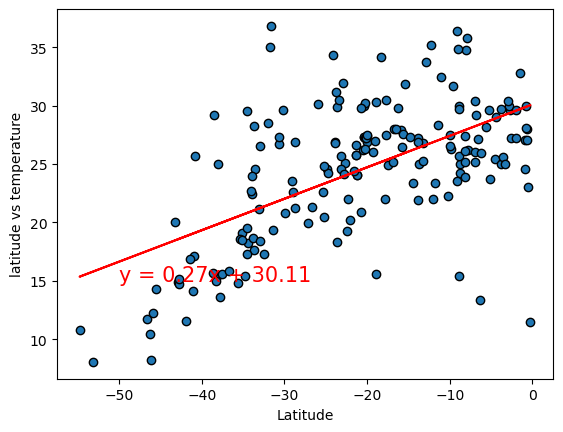

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'latitude vs temperature', (-50, 15))


**Discussion about the linear relationship:** On the northern hemisphere there is a strong linear correlation between  temperature and latitiude, as latitude increases temperature decreases. On the southern hemisphere, there is a weak correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19753703583112892


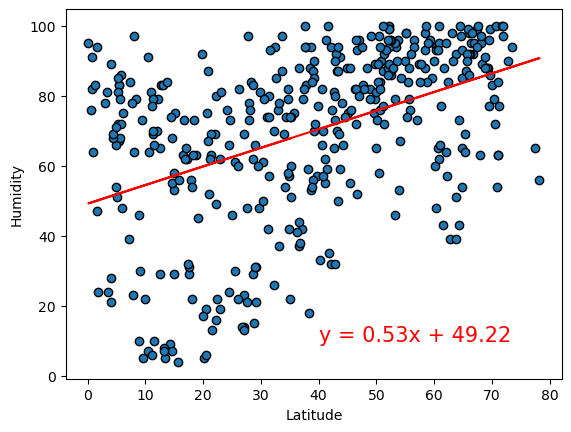

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (40,10))

The r-value is: 0.0002328171113609175


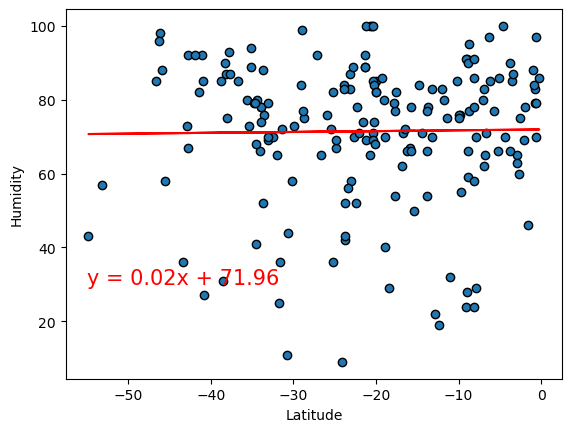

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55,30))

**Discussion about the linear relationship:** Both on the northern and southern hemisphere, there is no correlation between humidity and latitude.The correlation on northern hemisphere is just slighly stronger than the one on southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.047199602053763896


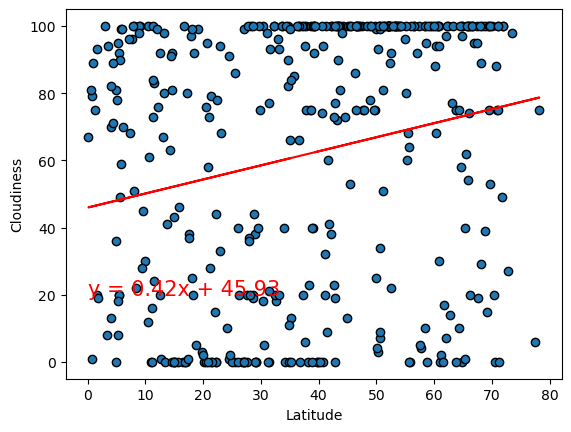

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (0,20))

The r-value is: 0.06141688173912308


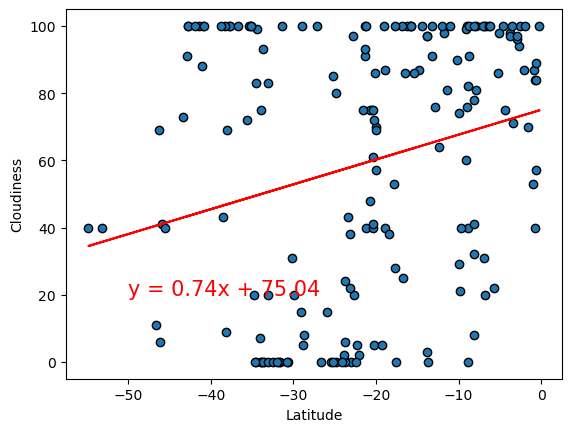

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-50,20))

**Discussion about the linear relationship:** Both on the northern and southern hemisphere, there is no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01664433487879354


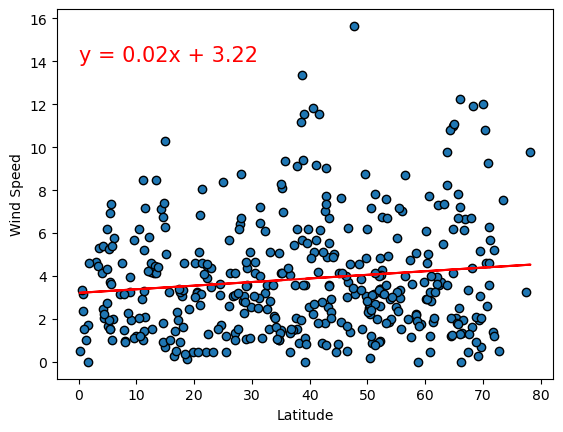

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (0,14))

The r-value is: 0.018459172376537655


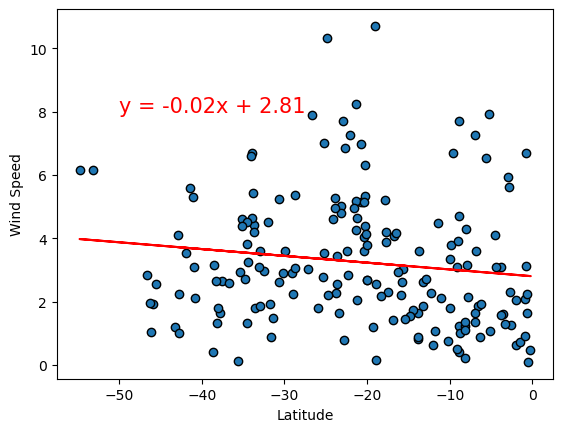

In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-50,8))

**Discussion about the linear relationship:**  Both on the northern and southern hemisphere, there is no correlation between wind speed and latitude.